In [ ]:
# -*- coding:utf-8 -*-
'''
Created on 2020年2月15日

@author: zfl
'''

In [39]:
#将需要用的包导入
import pandas as pd
import numpy as np
import re
import nltk #pip install nltk
import os

In [41]:
#查看当前的工作路径
os.getcwd() 

'D:\\graduate_student\\2020spring\\案例大赛\\lda'

# 整体语料的主题词提取

In [16]:
###文档以列表的形式存在###
theme = pd.read_csv("../theme.csv",usecols = [1,3])
theme

,news_title,news_theme
0,0,#今天有话说#【肖战事件：没有胜利者的战争】德国慕尼黑大学法学博士吴一兴谈及肖战#227大团...
1,1,【#意大利新增566例新冠肺炎# #意大利累计确诊1694例新冠肺炎#】根据当地时间3月1日...
2,2,【#武磊造乌龙# 西班牙人领先马竞】西班牙人vs马德里竞技的比赛第24分钟，武磊传中造成萨维...
3,3,#上海老洋房##安家#\n有钱人的世界根本想象不到，1.5亿的上海老洋房，房似锦徐姑姑给我冲
4,4,【#深圳新增由英国途经香港输入病例#】据人民日报记者贺林平，3月1日凌晨，深圳市卫生健康委报...
...,...,...
1625,1649,#民民小调查#【#如何看待女厕设男童小便池#？】为了方便带孩子的母亲，杭州市第一人民医院在女...
1626,1650,【#境内确诊217例新型冠状病毒肺炎病例#】截至今日18时，我国境内累计报告新型冠状病毒感染...
1627,1651,钟南山院士今年83岁了，视频里根本看不出来！你知道吗，钟南山院士常年坚持运动，曾在1959年...
1628,1653,#想见你主演重回拍摄地# 9日晚，@施柏宇patrick 晒出与@許光漢GregHan @柯...


##  数据预处理

In [23]:
theme=theme.dropna()#去除缺失值

In [62]:
#将特殊符号去除
import re
import warnings
warnings.filterwarnings("ignore")
r1 = '[a-zA-Z0-9’!"#$%&\'()*+,-./:：\n;<=>?@，。?★、…【】ㅠㅠڡ๑《》？“”‘’！[\\]^_`{|}~]+'
theme['clean_text'] = ''
text_len = theme.shape[0]
for i in range(text_len):
    a = re.sub(r1,'',theme.iloc[i,1])
    theme.iloc[i,2] = a

In [63]:
for i in range(text_len):
    theme.iloc[i,2]= re.sub("[A-Za-z0-9\[\`\~\!\@\#\$\^\&\*\(\)\=\|\{\}\'\:\;\'\,\[\]\.\<\>\/\?\~\！\@\#\\\&\*\%]"," ",theme.iloc[i,2])

In [64]:
theme

,news_title,news_theme,clean_text
0,0,#今天有话说#【肖战事件：没有胜利者的战争】德国慕尼黑大学法学博士吴一兴谈及肖战#227大团...,今天有话说肖战事件没有胜利者的战争德国慕尼黑大学法学博士吴一兴谈及肖战大团结事件时表示肖战本...
1,1,【#意大利新增566例新冠肺炎# #意大利累计确诊1694例新冠肺炎#】根据当地时间3月1日...,意大利新增例新冠肺炎 意大利累计确诊例新冠肺炎根据当地时间月日时意大利卫生部公布的最近数据意...
2,2,【#武磊造乌龙# 西班牙人领先马竞】西班牙人vs马德里竞技的比赛第24分钟，武磊传中造成萨维...,武磊造乌龙 西班牙人领先马竞西班牙人马德里竞技的比赛第分钟武磊传中造成萨维奇打进乌龙西班牙人...
3,3,#上海老洋房##安家#\n有钱人的世界根本想象不到，1.5亿的上海老洋房，房似锦徐姑姑给我冲,上海老洋房安家有钱人的世界根本想象不到亿的上海老洋房房似锦徐姑姑给我冲
4,4,【#深圳新增由英国途经香港输入病例#】据人民日报记者贺林平，3月1日凌晨，深圳市卫生健康委报...,深圳新增由英国途经香港输入病例据人民日报记者贺林平月日凌晨深圳市卫生健康委报告例境外输入新冠...
...,...,...,...
1625,1649,#民民小调查#【#如何看待女厕设男童小便池#？】为了方便带孩子的母亲，杭州市第一人民医院在女...,民民小调查如何看待女厕设男童小便池为了方便带孩子的母亲杭州市第一人民医院在女厕所门口设置了一...
1626,1650,【#境内确诊217例新型冠状病毒肺炎病例#】截至今日18时，我国境内累计报告新型冠状病毒感染...,境内确诊例新型冠状病毒肺炎病例截至今日时我国境内累计报告新型冠状病毒感染的肺炎病例例其中确诊...
1627,1651,钟南山院士今年83岁了，视频里根本看不出来！你知道吗，钟南山院士常年坚持运动，曾在1959年...,钟南山院士今年岁了视频里根本看不出来你知道吗钟南山院士常年坚持运动曾在年月的首届全运会上以秒...
1628,1653,#想见你主演重回拍摄地# 9日晚，@施柏宇patrick 晒出与@許光漢GregHan @柯...,想见你主演重回拍摄地 日晚施柏宇 晒出与許光漢 柯佳嬿 一起重回想见你拍摄地的合照一年了回到...


In [96]:
#停用词获取
stopwords1= [line.rstrip() for line in open('中文停用词表.txt', 'r', encoding='utf-8')]
stopwords2= [line.rstrip() for line in open('哈工大停用词表.txt', 'r', encoding='utf-8')]
stopwords3 = [line.rstrip() for line in open('四川大学机器智能实验室停用词库.txt', 'r', encoding='utf-8')]
stopwords = stopwords1 + stopwords2 + stopwords3

In [100]:
stopwords = stopwords+['全文','展开']

In [101]:
# 定义分词和停用词去除的函数
import jieba
from bs4 import BeautifulSoup
ch_stopwords = set(stopwords)
def clean_Ctext(text):
    text = BeautifulSoup(text,'html.parser').get_text()
    words = text.split()
    words = [w for w in words if w not in ch_stopwords] #如果有需要中文停用词，要自己去下
    return ' '.join(words)
def split_sentences(review):
    raw_sentences = jieba.cut(review,cut_all = True)
    sentences = [clean_Ctext(s) for s in raw_sentences if s]
    return ' '.join(sentences)
# 第三步：向量化函数和调用函数
# 向量化函数,当输入一个列表时，列表里的数将被一个一个输入，最后返回也是一个个列表的输出
theme['clean_text'] = theme.clean_text.apply(split_sentences)
# 调用函数进行分词和去除停用词

In [102]:
##最后一定要是这种形式的###
theme

,news_title,news_theme,clean_text
0,0,#今天有话说#【肖战事件：没有胜利者的战争】德国慕尼黑大学法学博士吴一兴谈及肖战#227大团...,今天 话 说 肖 战事 事件 胜利 胜利 胜利者 战争 德国 德国...
1,1,【#意大利新增566例新冠肺炎# #意大利累计确诊1694例新冠肺炎#】根据当地时间3月1日...,意大利 大利 大利 新增 例 新 冠 肺炎 意大利 大利 大利 累计 ...
2,2,【#武磊造乌龙# 西班牙人领先马竞】西班牙人vs马德里竞技的比赛第24分钟，武磊传中造成萨维...,武 磊 造 乌龙 西班牙 西班牙 西班牙人 领先 马 竞 西班牙 西班...
3,3,#上海老洋房##安家#\n有钱人的世界根本想象不到，1.5亿的上海老洋房，房似锦徐姑姑给我冲,上海 老洋房 洋房 洋房 安家 有钱 有钱 有钱人 世界 根本 想象 不...
4,4,【#深圳新增由英国途经香港输入病例#】据人民日报记者贺林平，3月1日凌晨，深圳市卫生健康委报...,深圳 新增 英国 途经 香港 输入 病例 人民 人民 人民日报 日报 ...
...,...,...,...
1625,1649,#民民小调查#【#如何看待女厕设男童小便池#？】为了方便带孩子的母亲，杭州市第一人民医院在女...,民 民 小调 调查 看待 女厕 设 男童 小便 小便 小便池 便池 便...
1626,1650,【#境内确诊217例新型冠状病毒肺炎病例#】截至今日18时，我国境内累计报告新型冠状病毒感染...,境内 确诊 例 新型 冠状 冠状 冠状病毒 病毒 病毒 肺炎 病例 今...
1627,1651,钟南山院士今年83岁了，视频里根本看不出来！你知道吗，钟南山院士常年坚持运动，曾在1959年...,钟南山 南山 南山 院士 今年 年岁 视频 里根 根本 看不出 不出 看...
1628,1653,#想见你主演重回拍摄地# 9日晚，@施柏宇patrick 晒出与@許光漢GregHan @柯...,想见 主演 重回 拍摄 拍摄 拍摄地 日 晚 施 柏 宇 晒 出...


In [577]:
# 第四步：使用TfidVectorizer进行TF-idf词袋模型的构建
from sklearn.feature_extraction.text import TfidfVectorizer
Tf = TfidfVectorizer(use_idf=True)
Tf.fit(theme.clean_text)
vocs = Tf.get_feature_names()
corpus_array = Tf.transform(theme.clean_text).toarray()
corpus_norm_df = pd.DataFrame(corpus_array, columns=vocs)
corpus_norm_df

,ᴛʀ,ᴛʀᴀᴄᴋ,ᴛʀᴀᴄᴋ𝟶𝟷𝟷𝟹ᴛʀᴀᴄᴋ,一万,一万多,一万多名,一丈,一上,一下,一下子,...,龙港,龙虾,龙逆天,𝐃𝐀𝐘,𝗛𝗼𝗽𝗲𝗹𝗲𝘀𝘀,𝗥𝗼𝗺𝗮𝗻𝘁𝗶𝗰,𝟶𝟷,𝟶𝟸,𝟶𝟹,𝟶𝟺
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 构建LDA主题模型

In [104]:
# 第五步：构建LDA主题模型
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=2, max_iter=500, random_state=42)
LDA_corpus = np.array(LDA.fit_transform(corpus_array))
LDA_corpus

array([[0.92264182, 0.07735818],
       [0.87946609, 0.12053391],
       [0.13956906, 0.86043094],
       ...,
       [0.84031734, 0.15968266],
       [0.8694656 , 0.1305344 ],
       [0.89853699, 0.10146301]])

In [578]:
#一共有5个主题
LDA_corpus.shape

(1629, 2)

从LDA的主题分类结果中挑出关于疫情的主题，再进行主题词的提取

In [579]:
LDA_corpus_one = np.zeros([LDA_corpus.shape[0]])
corpus_norm_df['LDA_labels'] = LDA_corpus.argmax(axis=1)
corpus_norm_df.head()

,ᴛʀ,ᴛʀᴀᴄᴋ,ᴛʀᴀᴄᴋ𝟶𝟷𝟷𝟹ᴛʀᴀᴄᴋ,一万,一万多,一万多名,一丈,一上,一下,一下子,...,龙虾,龙逆天,𝐃𝐀𝐘,𝗛𝗼𝗽𝗲𝗹𝗲𝘀𝘀,𝗥𝗼𝗺𝗮𝗻𝘁𝗶𝗰,𝟶𝟷,𝟶𝟸,𝟶𝟹,𝟶𝟺,LDA_labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [688]:
# 第六步：打印每个单词的主题的权重值，作为之后主题演化的特征
tt_matrix = LDA.components_
i = 0
for tt_m in tt_matrix:
    tt_dict_1= [(name, tt) for name, tt in zip(vocs, tt_m)]
    tt_dict_1 = sorted(tt_dict_1, key=lambda x: x[1], reverse=True)
    # 打印权重值大于0.6的主题词
    tt_dict_1 = [tt_threshold for tt_threshold in tt_dict_1 if tt_threshold[1] > 0.6]
    if(i==1):
        print(tt_dict_1)
    i = i+1

[('基斯', 2.0795900857616854), ('巴基', 1.5667657849978065), ('邮件', 1.5222683790345555), ('投递', 1.3067249687062032), ('基斯坦', 1.2523317702703793), ('巴基斯', 1.2523317702703793), ('卡塔', 1.223162091913344), ('塔尔', 1.223162091913344), ('华为', 0.9180114207821155), ('收件', 0.8815007001466373), ('谅解', 0.8815007001466373), ('巴基斯坦', 0.8509644092845223), ('卡塔尔', 0.8389452732172531), ('一代', 0.82760765421506), ('塔利', 0.8047208436480182), ('主编', 0.7956752031130492), ('开赛', 0.7850452882830481), ('邮政', 0.7765901872702535), ('灭蝗', 0.7751861255641572), ('鸭子', 0.7751861255641572), ('折叠', 0.7392378130937638), ('穆罕', 0.7154427913892691), ('书法', 0.6924480359660874), ('栏目', 0.6924480359660874), ('王松奇', 0.6924480359660874), ('社科', 0.6924480359660874), ('行家', 0.6924480359660874), ('解聘', 0.6924480359660874), ('期刊', 0.68132472331083), ('文章', 0.679704138469787), ('核心', 0.6795808830602711), ('中国邮政', 0.6792029748783162), ('代收', 0.6792029748783162), ('地处', 0.6792029748783162), ('寄往', 0.6792029748783162), ('寄达', 0.679202974

# 关于疫情的主题词提取

In [718]:
ncov_topic_array = corpus_array[corpus_norm_df.LDA_labels==0,]

In [721]:
###一共提取出5个主题
LDA_ncov = LatentDirichletAllocation(n_components=2, max_iter=500, random_state=42)
LDA_ncov_corpus = np.array(LDA_ncov.fit_transform(ncov_topic_array))
LDA_ncov_corpus

array([[0.92258961, 0.07741039],
       [0.88045678, 0.11954322],
       [0.90635836, 0.09364164],
       ...,
       [0.90702439, 0.09297561],
       [0.90228919, 0.09771081],
       [0.89894512, 0.10105488]])

In [ ]:
Tf.fit(theme.clean_text)
vocs = Tf.get_feature_names()

In [723]:
# 第六步：打印每个单词的主题的权重值，作为之后主题演化的特征
tt_ncov_matrix = LDA_ncov.components_
i = 0
for tt_m in tt_ncov_matrix:
    tt_dict = [(name, tt) for name, tt in zip(vocs, tt_m)]
    tt_dict = sorted(tt_dict, key=lambda x: x[1], reverse=True)
    #打印权重值大于0.6的主题词
    tt_dict = [tt_threshold for tt_threshold in tt_dict if tt_threshold[1] > 0.6]
    if(i==0):
        print(tt_dict)
    i = i+1

[('病毒', 32.568365107915426), ('武汉', 28.6223264062178), ('肺炎', 22.633410263876208), ('疫情', 22.55944213129479), ('冠状', 22.4135160199372), ('病例', 22.293272767706277), ('医院', 21.09090878601242), ('感染', 20.89654917563327), ('确诊', 19.629418171753525), ('人员', 19.19109727807062), ('湖北', 18.98929588901555), ('中国', 15.837968522803719), ('口罩', 15.222005219154003), ('工作', 14.720099147806375), ('新型', 14.711090279981503), ('患者', 14.185440634651405), ('视频', 13.987503576514378), ('南山', 13.6758241812273), ('新增', 11.638769240376337), ('北京', 11.472667898569457), ('冠状病毒', 11.447603797986858), ('医疗', 11.34463263870706), ('大利', 11.118514155829583), ('防护', 10.893944984620754), ('人民', 10.888447535150531), ('医护', 10.6394312512362), ('时间', 10.344925497775934), ('防控', 10.277475328953075), ('诊病', 9.998697362416177), ('发布', 9.635470223342756), ('接触', 9.630834727280746), ('隔离', 9.510683541597507), ('卫生', 9.42152570969522), ('韩国', 9.332436495792017), ('护人', 9.282514841651773), ('出院', 9.127714899604948), ('日报', 9.028

# 主题词流行度计算

从所有theme文件中得到与疫情有关的关键词（每一个热搜对应的theme都有3~5个关键词，通过LDA提取出来），计算每一个关键词的流行度，以时间为单位，构造时间序列，计算所有时间序列的相似性，得到时间序列的相似性矩阵，将具有相似演化过程的关键词（主题）分为一个类，最后归纳总结出大类。

In [730]:
##获取与疫情相关的主题词
tt_ncov_matrix = LDA_ncov.components_
i = 0
for tt_m in tt_ncov_matrix:
    tt_dict = [(name, tt) for name, tt in zip(vocs, tt_m)]
    tt_dict = sorted(tt_dict, key=lambda x: x[1], reverse=True)
    #打印权重值大于2的主题词
    tt_dict = [tt_threshold for tt_threshold in tt_dict if tt_threshold[1] > 2]
    if(i==0):
        break
    print(tt_dict)

In [732]:
tt_dict

[('病毒', 32.568365107915426),
 ('武汉', 28.6223264062178),
 ('肺炎', 22.633410263876208),
 ('疫情', 22.55944213129479),
 ('冠状', 22.4135160199372),
 ('病例', 22.293272767706277),
 ('医院', 21.09090878601242),
 ('感染', 20.89654917563327),
 ('确诊', 19.629418171753525),
 ('人员', 19.19109727807062),
 ('湖北', 18.98929588901555),
 ('中国', 15.837968522803719),
 ('口罩', 15.222005219154003),
 ('工作', 14.720099147806375),
 ('新型', 14.711090279981503),
 ('患者', 14.185440634651405),
 ('视频', 13.987503576514378),
 ('南山', 13.6758241812273),
 ('新增', 11.638769240376337),
 ('北京', 11.472667898569457),
 ('冠状病毒', 11.447603797986858),
 ('医疗', 11.34463263870706),
 ('大利', 11.118514155829583),
 ('防护', 10.893944984620754),
 ('人民', 10.888447535150531),
 ('医护', 10.6394312512362),
 ('时间', 10.344925497775934),
 ('防控', 10.277475328953075),
 ('诊病', 9.998697362416177),
 ('发布', 9.635470223342756),
 ('接触', 9.630834727280746),
 ('隔离', 9.510683541597507),
 ('卫生', 9.42152570969522),
 ('韩国', 9.332436495792017),
 ('护人', 9.282514841651773),
 ('出院

In [152]:
#将热搜数据读入，获取发博时间
resou = pd.read_csv("../resou.csv",encoding = "GBK")
resou = resou.dropna()

In [169]:
###将时间加入theme数据框内，将时间转换为周/天
for i in list(theme.news_title):
    theme['date'][i] = re.search(r"(\d{4}-\d{1,2}-\d{1,2})",resou.final[i]).groups()[0]

In [171]:
theme

,news_title,news_theme,clean_text,date
0,0,#今天有话说#【肖战事件：没有胜利者的战争】德国慕尼黑大学法学博士吴一兴谈及肖战#227大团...,今天 话 说 肖 战事 事件 胜利 胜利 胜利者 战争 德国 德国...,2020-03-02
1,1,【#意大利新增566例新冠肺炎# #意大利累计确诊1694例新冠肺炎#】根据当地时间3月1日...,意大利 大利 大利 新增 例 新 冠 肺炎 意大利 大利 大利 累计 ...,2020-03-02
2,2,【#武磊造乌龙# 西班牙人领先马竞】西班牙人vs马德里竞技的比赛第24分钟，武磊传中造成萨维...,武 磊 造 乌龙 西班牙 西班牙 西班牙人 领先 马 竞 西班牙 西班...,2020-03-02
3,3,#上海老洋房##安家#\n有钱人的世界根本想象不到，1.5亿的上海老洋房，房似锦徐姑姑给我冲,上海 老洋房 洋房 洋房 安家 有钱 有钱 有钱人 世界 根本 想象 不...,2020-03-02
4,4,【#深圳新增由英国途经香港输入病例#】据人民日报记者贺林平，3月1日凌晨，深圳市卫生健康委报...,深圳 新增 英国 途经 香港 输入 病例 人民 人民 人民日报 日报 ...,2020-03-02
...,...,...,...,...
1625,1649,#民民小调查#【#如何看待女厕设男童小便池#？】为了方便带孩子的母亲，杭州市第一人民医院在女...,民 民 小调 调查 看待 女厕 设 男童 小便 小便 小便池 便池 便...,2020-01-21
1626,1650,【#境内确诊217例新型冠状病毒肺炎病例#】截至今日18时，我国境内累计报告新型冠状病毒感染...,境内 确诊 例 新型 冠状 冠状 冠状病毒 病毒 病毒 肺炎 病例 今...,2020-01-21
1627,1651,钟南山院士今年83岁了，视频里根本看不出来！你知道吗，钟南山院士常年坚持运动，曾在1959年...,钟南山 南山 南山 院士 今年 年岁 视频 里根 根本 看不出 不出 看...,2020-01-21
1628,1653,#想见你主演重回拍摄地# 9日晚，@施柏宇patrick 晒出与@許光漢GregHan @柯...,想见 主演 重回 拍摄 拍摄 拍摄地 日 晚 施 柏 宇 晒 出...,2020-01-21


In [649]:
###主题词获取
LDA_word = list(np.zeros(len(tt_dict)))
for i in range(len(tt_dict)):
    LDA_word[i] = tt_dict[i][0]

In [650]:
###得到与疫情相关的主题词一共608个
len(LDA_word)

608

In [651]:
###构造主题词的流行度矩阵（以天为单位）
LDA_theme_time = pd.DataFrame(columns=LDA_word)
LDA_theme_time['date'] = sorted(list(set(theme.date)))

In [652]:
#将每一天所有的词语都汇集起来，计算每一天每个词语的流行度
split = pd.DataFrame(columns = ['date','word_split'])
k = 0
for i in theme.groupby('date'):
    split.at[k,'date'] = i[0]    
    split.at[k,'word_split'] = " ".join(list(i[1].iloc[:,2]))
    k = k+1
split

,date,word_split
0,2020-01-21,红糖 饼 发面 揉面 三步 教你做 红糖 饼 外皮 酥脆 层次 ...
1,2020-01-22,姜 思达 采访 张 艺 兴 张 艺 兴 男人 至死 少年 仅 ...
2,2020-01-23,好消息 消息 消息 温州 首例 新型 肺炎 确诊 患者 痊愈 温州 ...
3,2020-01-24,全国 确诊 新型 肺炎 病例 湖南 新增 例 新型 肺炎 确诊 诊病 ...
4,2020-01-25,鼠年 春晚 晚节 节目 节目 节目单  易 烊 千 玺 除夕 除...
5,2020-01-26,北京 三名 名医 医生 感染 新型 肺炎 北京 北京 北京市 京市 京市...
6,2020-01-27,聚众 打牌 躲猫猫 猫猫 猫猫 纪委 杀出 回马枪 马枪 马枪 湖北 ...
7,2020-01-28,整点 点播 点 广东 延迟 开学 复工 广东 新增 例 确...
8,2020-01-29,几天 天女 女孩 女孩 女孩子 孩子 孩子 头发 应该 样子 ...
9,2020-01-30,张文宏 二战 战场 开打 国际 战 疫 动态 展望 复旦 复旦 复旦...


In [653]:
##需要填充的主题词流行度数据框
LDA_theme_time

,病毒,武汉,肺炎,疫情,冠状,病例,医院,感染,确诊,人员,...,学习,广播,更多,民医院,政治,局长,当天,科大,预测,date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-21
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-23
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-25
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-26
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-27
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-28
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-30


In [654]:
#计算某一个词在词语集合中出现的次数
def check(s1,s2):
    return sum(map(lambda ch:s1.count(ch),s2))

In [655]:
##统计某词在当天出现的频次
for i in range(LDA_theme_time.shape[0]):
    for j in range(len(tt_dict)):
        LDA_theme_time.iloc[i,j] = check(tt_dict[j][0],split.iloc[i,1])

In [656]:
LDA_theme_fre = LDA_theme_time.iloc[:,0:LDA_theme_time.shape[1]-1]

In [657]:
LDA_theme_fre

,病毒,武汉,肺炎,疫情,冠状,病例,医院,感染,确诊,人员,...,上升,学习,广播,更多,民医院,政治,局长,当天,科大,预测
0,79,25,15,31,39,92,102,33,24,54,...,32,21,15,26,122,16,8,15,42,1
1,170,53,32,29,121,114,74,62,31,61,...,32,9,17,15,86,19,14,16,72,9
2,140,85,60,67,88,126,71,37,59,76,...,13,46,17,14,90,16,29,19,44,4
3,42,7,10,5,19,32,7,24,8,6,...,3,0,9,0,10,1,8,6,0,0
4,112,109,50,29,72,87,75,35,32,61,...,7,9,11,10,89,31,13,7,49,6
5,267,67,63,67,141,220,133,118,54,102,...,32,48,21,6,163,58,13,31,78,8
6,123,86,28,34,60,130,38,51,40,37,...,22,9,11,4,53,23,22,19,25,3
7,82,29,10,34,41,54,48,26,16,60,...,28,31,16,4,60,28,11,21,35,10
8,92,26,27,26,57,51,25,53,13,25,...,14,34,8,7,28,5,16,11,30,0
9,146,34,34,78,91,107,45,76,34,75,...,40,37,11,26,67,54,20,36,55,8


In [658]:
###计算出主题热度
LDA_theme_hot = LDA_theme_fre.div(LDA_theme_fre.sum(axis = 1),axis='rows' )

In [659]:
###主题流行度标准化
LDA_theme_hot_stand = LDA_theme_hot.sub(LDA_theme_hot.mean(axis = 1),axis='rows').div(LDA_theme_hot.std(axis = 1),axis='rows')

In [660]:
###主题流行度归一化
LDA_theme_hot_normalized = LDA_theme_hot.sub(LDA_theme_hot.min(axis = 1),axis='rows').div(LDA_theme_hot.max(axis = 1).sub(LDA_theme_hot.min(axis = 1)),axis='rows')

In [296]:
###方法一，计算两条时间序列的距离
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return np.sqrt(LB_sum)

In [314]:
###方法二：同样也是计算两条时间序列的距离
def DTWDistance(s1, s2, w):
    DTW={}

    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)): 
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [477]:
##函数goal：将多条时间序列聚类
def k_means(data,kinds,num_iter,epsilon):
    data_1 = data.T
    centroids=data.sample(n = kinds,random_state = 23,axis = 1)
    counter=0
    #theme_julei = pd.DataFrame(columns=['word','kind'])
    #theme_julei['word'] = list(LDA_theme_hot_stand)
    for n in range(num_iter):
        counter+=1
        print ("this is the "+str(counter)+"th iteration")
        #assignments={}
        #assign data points to clusters
        for i in range(data.shape[1]):
            theme_series = data.iloc[:,i]
            min_dist=float('inf')
            closest_clust=None
            for j in range(centroids.shape[1]):
                #print("this is the "+str(j)+"centroids")
                theme_center_series = centroids.iloc[:,j]
                if LB_Keogh(theme_series,theme_center_series,kinds)<min_dist:
                    cur_dist=DTWDistance(theme_series,theme_center_series,kinds)
                    if cur_dist < min_dist:
                        min_dist = cur_dist
                        closest_clust=j
            data_1.at[list(data)[i],'kind'] = closest_clust
        #recalculate centroids of clusters
        centroids_a = (data_1.groupby('kind').sum()/data_1.groupby('kind').count()).T
        centroids_dist = np.sum((centroids_a.values- centroids.values)**2)
        print("the centroids_dist is"+str(centroids_dist)+str(epsilon))
        if(centroids_dist<epsilon):
            print("!!!")
            break
        else:
            centroids = centroids_a
    return(data_1)

In [693]:
data_means = k_means(LDA_theme_hot_normalized,10,50,0.01)##这里的参数可以自行指定

this is the 1th iteration
the centroids_dist is1.70483941103813420.01
this is the 2th iteration
the centroids_dist is0.101188893882599590.01
this is the 3th iteration
the centroids_dist is0.045776149225324230.01
this is the 4th iteration
the centroids_dist is0.0187393640828197630.01
this is the 5th iteration
the centroids_dist is0.0174121962965710780.01
this is the 6th iteration
the centroids_dist is0.0150293152158066470.01
this is the 7th iteration
the centroids_dist is0.0222970536680995620.01
this is the 8th iteration
the centroids_dist is0.0230986340623668270.01
this is the 9th iteration
the centroids_dist is0.0209806220864753070.01
this is the 10th iteration
the centroids_dist is0.0191482685628215040.01
this is the 11th iteration
the centroids_dist is0.0172730993252269950.01
this is the 12th iteration
the centroids_dist is0.018921163037327080.01
this is the 13th iteration
the centroids_dist is0.0166567233849523560.01
this is the 14th iteration
the centroids_dist is0.014599897296010

In [694]:
data_means.to_csv("theme_norm_kmeans_10.csv")##将聚出的主题词及其类别信息存为csv格式

In [725]:
##读入数据
theme_kmeans = pd.read_csv("theme_kmeans.csv")
theme_kmeans['key'] = theme_kmeans.iloc[:,0]
theme_kmeans.drop([theme_kmeans.columns[0]], axis=1,inplace=True)#去除掉第0列id列

In [733]:
#绘制时间序列图时需要卡主题词的lda权重，因此将权重信息放入到数据框中
for i in range(theme_kmeans.shape[0]):
    theme_kmeans.at[i,'lda_weight'] = tt_dict[i][1]

In [734]:
theme_kmeans

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,kind,key,lda_weight
0,2.594367,4.788011,3.782665,4.604839,3.735674,4.935744,4.286637,3.198702,4.712015,4.051489,...,1.287890,0.493557,1.030460,2.385045,2.386955,0.662116,0.415624,3.0,病毒,32.568365
1,0.146786,0.930226,1.886257,0.213185,3.608772,0.643455,2.735408,0.442981,0.699713,0.113014,...,0.631970,0.117984,-0.329833,0.187488,2.083597,-0.716667,-0.047553,2.0,武汉,28.622326
2,-0.306469,0.237803,1.024253,0.589613,1.113035,0.557609,0.303750,-0.544918,0.760506,0.113014,...,0.041642,-0.203935,0.690387,0.748566,1.072400,-0.218774,0.025581,2.0,肺炎,22.633410
3,0.418740,0.138886,1.265614,-0.037767,0.224722,0.643455,0.555301,0.702955,0.699713,1.660272,...,0.107234,0.708170,1.265896,-0.373591,1.072400,0.662116,0.244980,1.0,疫情,22.559442
4,0.781344,3.172358,1.989697,1.718895,2.043649,2.231602,1.645354,1.066918,2.584279,2.117416,...,0.566378,-0.257589,0.167197,1.543427,0.465682,0.087623,0.171847,1.0,冠状,22.413516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,-0.261144,-0.190839,-0.492873,-0.539670,0.309323,0.450302,0.094125,0.390987,-0.576928,0.816313,...,-0.745462,-0.686815,0.010240,-0.467104,-0.039916,0.355720,0.025581,2.0,政治,2.013333
604,-0.623748,-0.355702,-0.044631,0.338661,-0.452088,-0.515463,0.052200,-0.492924,0.091789,-0.379296,...,-0.220726,0.600864,-0.696066,0.000461,0.364563,-0.448571,-0.705750,4.0,局长,2.010856
605,-0.306469,-0.289757,-0.389433,0.087709,-0.705892,-0.129157,-0.073576,0.027024,-0.212174,0.183344,...,-0.155134,0.225291,0.454952,0.888836,-0.242155,0.815314,0.196224,2.0,当天,2.008100
606,0.917321,1.556704,0.472571,-0.665146,1.070735,0.879531,0.177975,0.754950,0.942883,0.851478,...,1.156706,1.673929,0.611909,0.327757,-0.039916,1.006812,1.561375,1.0,科大,2.006489


In [735]:
#设置将主题词权重大于2的主题词挑选出来
theme_kmeans_5 = theme_kmeans.loc[theme_kmeans.lda_weight>2,:]

In [736]:
#输出各个类别的主题词
for i,ind in theme_kmeans_5.groupby('kind'):    
    print(ind.key.values)

['隔离' '疑似' '观察' '累计' '密切' '消息' '死亡' '教育' '检测' '研究' '措施' '健康' '黄冈' '四川'
 '春节' '浙江' '加油' '致敬' '奥运' '影响' '要求' '去世' '协和' '紧急' '支援' '企业' '指挥' '希望'
 '风险' '拍摄' '接受' '呼吸' '机构' '伊朗' '采取' '需要' '关注' '严重' '危重' '火神' '已经' '黄石'
 '乘客' '书记' '返程' '龙江' '下午' '进入' '运输' '聚集' '总台' '支持' '捐赠' '钻石' '免费' '保障'
 '抗击' '临床' '江苏' '介绍' '蒙古' '排查' '干事' '抢救' '考试' '洗手' '做好' '投票' '负责' '场所'
 '安徽' '邮轮' '规模' '信息' '继续' '连续' '了解' '香港' '包括' '团队' '直播' '提供' '隐瞒' '深圳'
 '内蒙' '是否' '初步' '问题' '处理' '建设' '调查' '指导' '郑州' '封闭' '英雄' '注意' '最佳' '康复'
 '依然' '扩散' '核酸' '应该' '夜饭' '旅游' '游客' '决定' '相关' '暂停' '宣布' '参加' '航班' '级别'
 '火车' '无效' '显示' '收费' '车站' '目镜' '恢复' '假期' '使馆' '潜伏' '取消' '单位' '幼儿' '登记'
 '首次' '休息' '领导' '正常' '建议' '召开' '纪录' '高峰' '数据' '凌晨' '经历' '效果' '检查' '网页'
 '链接' '妈妈' '承认' '快递' '聚餐' '关键' '干嘛' '资源' '福建' '采访' '实验' '帮助' '志愿' '儿童'
 '判定' '火锅' '应急' '朝阳' '禁止' '准备' '床位' '应对' '十堰' '宣传' '台湾' '升机' '直升' '外卖'
 '费尽' '立案' '开展' '阴性' '白衣' '过后' '罗斯' '女孩' '以色列' '样本' '网络' '总统' '系统' '周刊'
 '延迟' '重庆' '减少' '真是' '阶段' '想见' '原因' '提醒' '辽宁' '联合' '客运' '高校' '采购' '董事'
 '最近'

In [ ]:
#载入绘图相应的包
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdate
import numpy as np
import datetime#这个包很关键

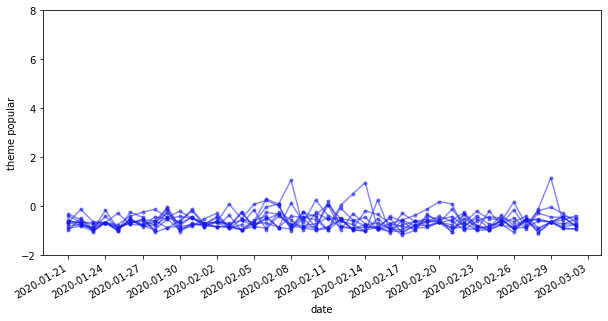

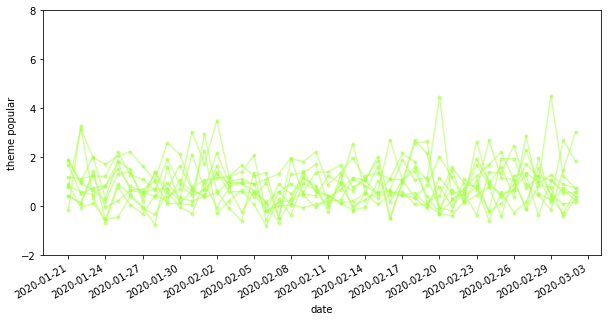

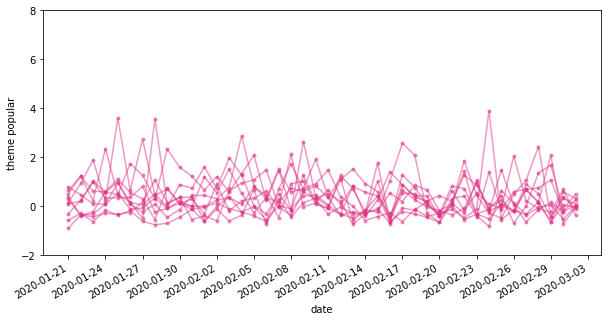

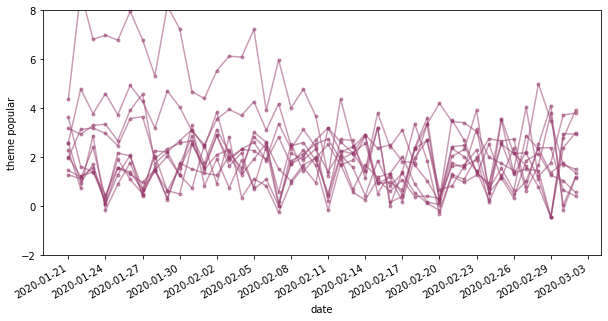

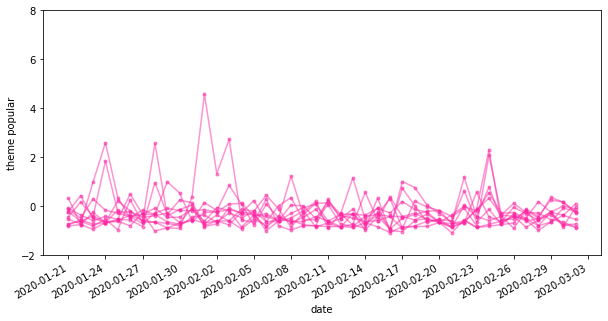

In [739]:
##随机生成颜色
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

#设定日期
start=datetime.datetime(2020,1,21)
stop=datetime.datetime(2020,3,3)
delta=datetime.timedelta(1)#设定日期的间隔
dates=mdate.drange(start,stop,delta)
##循环绘图
for i,ind in theme_kmeans_5.groupby("kind"):
    index = ind.shape[0]
    length = ind.shape[1]-3
    color = randomcolor()
    fig=plt.figure(figsize=(10,5))#调整画图空间的大小
    for j in range(10):        
        values = ind.iloc[j,0:length]
        plt.plot(dates,values,linestyle='-',marker='.',c=color,alpha=0.5)#作图
        ax=plt.gca()
        ax.set_ylim(-2, 8)
        ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3))#设定坐标轴的显示的刻度间隔
        fig.autofmt_xdate()#防止x轴上的数据重叠，自动调整。  
    plt.xlabel("date")
    plt.ylabel("theme popular")